# Import required libraries

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
#import imquality.brisque as brisque
images = os.listdir("B:/")
#Resize images to
SIZE = 800


# Read training images 

In [5]:
#Capture images and labels into arrays.
#Start by creating empty lists.
SIZE = 800
train_images = []
train_labels = [] 
#clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(7,7))
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob("B:/small_data/Train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
#         b, g, r = cv2.split(img)
#         img2 = clahe.apply(g)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
train_images 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
len(train_images)

72

# To classify unknown images, Read images

In [8]:
#Capture images and labels into arrays.
#Start by creating empty lists.
unknown_images = []
names = []
#for directory_path in glob.glob("cell_images/train/*"):


for img_path in glob.glob(os.path.join("B:/small_data/Test", "*.jpg")):
    print(img_path)
    names.append(img_path)
    img = cv2.imread(img_path, 0) #Reading color images
    img = cv2.resize(img, (SIZE, SIZE)) #Resize images
    unknown_images.append(img)
    
    #train_labels.append(label)
        
unknown_images = np.array(unknown_images)
#train_labels = np.array(train_labels)

In [9]:
unknown_images

array([], dtype=float64)

In [10]:
df = pd.DataFrame(names, columns = ['image_name'])
df.to_excel('C:/Users/Shraddha Pawar/Desktop/Names_newwst.xlsx')

# Read test images

In [11]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []
#clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(7,7))
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob("B:/small_data/Test/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
#         b, g, r = cv2.split(img)
#         img2 = clahe.apply(g)
        test_images.append(img)
        test_labels.append(label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Encode categorical labels as (0,1)

In [12]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [16]:
train_labels

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor',
       'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor',
       'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor',
       'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor',
       'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor', 'Poor'],
      dtype='<U4')

# Define train and test images and labels 

In [14]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Defin feature extractor function to extract required features

In [15]:
# Normalize pixel values to between 0 and 1
#x_train, x_test = x_train / 255.0, x_test / 255.0

###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  
        #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  
        #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]    
        #Full image
                       
        GLCM1 = greycomatrix(img, [1], [0])       
        GLCM_Energy1 = greycoprops(GLCM1, 'energy')[0]
        df['Energy1'] = GLCM_Energy1
        GLCM_corr1 = greycoprops(GLCM1, 'correlation')[0]
        df['Corr1'] = GLCM_corr1       
        GLCM_diss1 = greycoprops(GLCM1, 'dissimilarity')[0]
        df['Diss_sim1'] = GLCM_diss1       
        GLCM_hom1 = greycoprops(GLCM1, 'homogeneity')[0]
        df['Homogen1'] = GLCM_hom1       
        GLCM_contr1 = greycoprops(GLCM1, 'contrast')[0]
        df['Contrast1'] = GLCM_contr1

        GLCM2 = greycomatrix(img, [1], [np.pi/4])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [1], [np.pi/2])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
                
        GLCM4 = greycomatrix(img, [1], [3*np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
                
        GLCM5 = greycomatrix(img, [3], [0])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5      
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
               
        GLCM6 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6 = greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6      
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6       
        
        laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var() 
        df['laplacian'] = laplacian_var
        #b = brisque.score(img)
        #df['brisque'] = b
        
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

# Extract features from training set

In [40]:
image_features = feature_extractor(x_train)
X_for_ML = image_features

In [41]:
image_features

,Energy1,Corr1,Diss_sim1,Homogen1,Contrast1,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Diss_sim5,Homogen5,Contrast5,Energy6,Corr6,Diss_sim6,Homogen6,Contrast6,laplacian,Entropy
0,0.084539,0.998088,1.803176,0.503756,15.330695,0.082396,0.997491,2.077473,0.467445,20.082458,...,3.876321,0.368274,103.945232,0.079474,0.995903,2.761796,0.410849,32.870852,17.794227,6.414118
0,0.090452,0.997194,2.091757,0.455787,15.402717,0.089019,0.996264,2.413308,0.419336,20.471437,...,4.333314,0.334158,97.163443,0.087428,0.993184,3.311597,0.364024,37.436719,25.426821,6.443762
0,0.066531,0.998215,1.689047,0.506649,10.253509,0.064031,0.997628,1.989753,0.459853,13.604556,...,3.585836,0.357441,65.511937,0.061318,0.995759,2.699062,0.397300,24.387400,15.790216,6.772853
0,0.205228,0.997714,1.762622,0.512717,12.299593,0.203759,0.996212,2.204199,0.471642,20.338807,...,3.200638,0.426768,51.452200,0.201615,0.990490,3.244183,0.423931,50.989264,54.626895,6.167062
0,0.205924,0.997514,1.821061,0.500469,11.272785,0.204543,0.995872,2.187772,0.469457,18.687117,...,3.003977,0.435271,44.537164,0.202444,0.990023,3.092491,0.431072,45.108109,55.850830,5.953745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.170953,0.996492,1.826119,0.518386,30.274689,0.167369,0.993864,2.212791,0.484655,52.804128,...,3.175630,0.445039,140.865957,0.160506,0.983896,3.179239,0.443672,138.247640,117.055218,5.957681
0,0.205227,0.994861,1.776047,0.515405,17.704060,0.203824,0.991757,2.121139,0.484931,28.350342,...,2.929067,0.450599,67.781043,0.201621,0.978371,3.003493,0.445500,74.269490,90.926907,6.003966
0,0.069540,0.999016,1.565297,0.524975,7.227109,0.065991,0.998501,1.970581,0.458715,10.993622,...,3.575220,0.363881,49.344608,0.061761,0.996874,2.888874,0.385537,23.015210,12.832071,6.662305
0,0.059218,0.998442,1.681887,0.515466,10.499315,0.056787,0.997861,1.991228,0.464180,14.395986,...,3.777172,0.346665,74.564399,0.053593,0.996531,2.696509,0.402891,23.437124,13.360227,7.172604


In [42]:
image_features

,Energy1,Corr1,Diss_sim1,Homogen1,Contrast1,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Diss_sim5,Homogen5,Contrast5,Energy6,Corr6,Diss_sim6,Homogen6,Contrast6,laplacian,Entropy
0,0.084539,0.998088,1.803176,0.503756,15.330695,0.082396,0.997491,2.077473,0.467445,20.082458,...,3.876321,0.368274,103.945232,0.079474,0.995903,2.761796,0.410849,32.870852,17.794227,6.414118
0,0.090452,0.997194,2.091757,0.455787,15.402717,0.089019,0.996264,2.413308,0.419336,20.471437,...,4.333314,0.334158,97.163443,0.087428,0.993184,3.311597,0.364024,37.436719,25.426821,6.443762
0,0.066531,0.998215,1.689047,0.506649,10.253509,0.064031,0.997628,1.989753,0.459853,13.604556,...,3.585836,0.357441,65.511937,0.061318,0.995759,2.699062,0.397300,24.387400,15.790216,6.772853
0,0.205228,0.997714,1.762622,0.512717,12.299593,0.203759,0.996212,2.204199,0.471642,20.338807,...,3.200638,0.426768,51.452200,0.201615,0.990490,3.244183,0.423931,50.989264,54.626895,6.167062
0,0.205924,0.997514,1.821061,0.500469,11.272785,0.204543,0.995872,2.187772,0.469457,18.687117,...,3.003977,0.435271,44.537164,0.202444,0.990023,3.092491,0.431072,45.108109,55.850830,5.953745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.170953,0.996492,1.826119,0.518386,30.274689,0.167369,0.993864,2.212791,0.484655,52.804128,...,3.175630,0.445039,140.865957,0.160506,0.983896,3.179239,0.443672,138.247640,117.055218,5.957681
0,0.205227,0.994861,1.776047,0.515405,17.704060,0.203824,0.991757,2.121139,0.484931,28.350342,...,2.929067,0.450599,67.781043,0.201621,0.978371,3.003493,0.445500,74.269490,90.926907,6.003966
0,0.069540,0.999016,1.565297,0.524975,7.227109,0.065991,0.998501,1.970581,0.458715,10.993622,...,3.575220,0.363881,49.344608,0.061761,0.996874,2.888874,0.385537,23.015210,12.832071,6.662305
0,0.059218,0.998442,1.681887,0.515466,10.499315,0.056787,0.997861,1.991228,0.464180,14.395986,...,3.777172,0.346665,74.564399,0.053593,0.996531,2.696509,0.402891,23.437124,13.360227,7.172604


# train the lightgbm classifier 

In [48]:
import pickle
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3
d_train = lgb.Dataset(X_for_ML, label=y_train)
# d_train = lgb.Dataset(A, label=y_train)
# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':10,
              'num_class':4}  #no.of unique values in the target class not inclusive of the end value

lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates
# save the model to disk
filename = 'C:/Users/Shraddha Pawar/Desktop/iqa_lgb_classifier.sav'
pickle.dump(lgb_model, open(filename, 'wb'))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 32
[LightGBM] [Info] Start training from score -0.721318
[LightGBM] [Info] Start training from score -0.665748
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

# Predict on test data

In [45]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

# test_features = np.expand_dims(B, axis=0)
# test_for_RF = np.reshape(B, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.9183673469387755


# Classify unknown images 

In [46]:
#Predict on Unknown data
#Extract features from test data and reshape, just like training data
unknown_features = feature_extractor(unknown_images)
unknown_features = np.expand_dims(unknown_features, axis=0)
unknown_for_RF = np.reshape(unknown_features , (unknown_images.shape[0], -1))

# test_features = np.expand_dims(B, axis=0)
# test_for_RF = np.reshape(B, (x_test.shape[0], -1))

#classify unknown
unknown_prediction = lgb_model.predict(unknown_for_RF)
unknown_prediction=np.argmax(unknown_prediction, axis=1)
#Inverse le transform to get original label back. 
unknown_prediction = le.inverse_transform(unknown_prediction)


#Print overall accuracy
#from sklearn import metrics
#print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [21]:
len(unknown_prediction)

39

In [22]:
import pandas as pd 
df = pd.DataFrame(unknown_prediction, columns = ['labels'])
df.to_excel('C:/Users/Shraddha Pawar/Desktop/Classifications_newestt.xlsx')

# predict on random image from test data

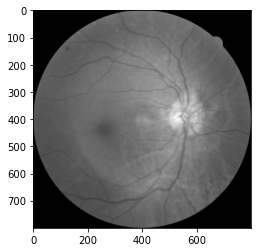

In [24]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img, cmap="gray")

In [25]:
n

37

In [26]:
#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
#input_img_features = input_img_features.drop(corr_features,axis=1)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['Poor']
The actual label for this image is:  Poor


C:\Users\Shraddha Pawar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# SVM classifier

In [27]:
from sklearn import svm 
classifier = svm.SVC(kernel='rbf', gamma='auto', C=2)
classifier.fit(X_for_ML, y_train)

SVC(C=2, gamma='auto')

In [28]:
y_predict = classifier.predict(input_img_for_RF)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(test_labels, test_prediction))



              precision    recall  f1-score   support

        Good       1.00      0.86      0.92        28
        Poor       0.84      1.00      0.91        21

    accuracy                           0.92        49
   macro avg       0.92      0.93      0.92        49
weighted avg       0.93      0.92      0.92        49



In [30]:
print(confusion_matrix(test_labels, test_prediction))

[[24  4]
 [ 0 21]]


# Write images by reading path from excel sheet

In [23]:
import xlrd
 
loc = ("C:/Users/Shraddha Pawar/Desktop/predicted.xlsx")
 
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
 
# For row 0 and column 0
sheet.cell_value(0, 0)
 
for i in range(sheet.nrows):   
    A = sheet.cell_value(i, 1)
    img = cv2.imread(A, 1)
    if sheet.cell_value(i,2) == 'Poor':
        cv2.imwrite(f"C:/Users/Shraddha Pawar/Desktop/{i}.jpg", img)

    

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [32]:
len(input_img_for_RF)

1

In [33]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_for_ML, y_train)
rf.score(test_for_RF , test_labels_encoded)

0.8979591836734694

In [34]:
scores = cross_val_score(rf, X_for_ML, y_train, cv=10)
print("Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), scores.std()*2))

Accuracy: 0.73(+/- 0.30)


In [35]:
predictions =rf.predict(test_for_RF)
metrics.accuracy_score(test_labels_encoded, predictions)

0.8979591836734694

In [36]:
false_positive_rate, true_positive_rate, threshold = roc_curve(test_labels_encoded, predictions)

In [37]:
A = roc_auc_score(test_labels_encoded, predictions)

In [38]:
r_probs = [0 for _ in range(len(test_labels_encoded))]
rf_probs = rf.predict_proba(test_for_RF)

In [39]:
rf_probs = rf_probs[:, 1]

In [40]:
r_auc = roc_auc_score(test_labels_encoded, r_probs)
rf_auc = roc_auc_score(test_labels_encoded, rf_probs)

In [41]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.957


In [42]:
r_fpr, r_tpr, _ = roc_curve(test_labels_encoded, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(test_labels_encoded, rf_probs)

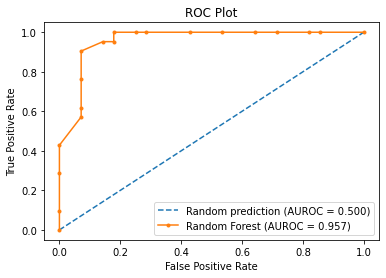

In [43]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [44]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_for_ML, y_train)
lr.score(test_for_RF , test_labels_encoded)

0.8367346938775511

# Load saved ML model 

In [2]:
import pickle
import lightgbm as lgb
loaded_model = pickle.load(open('C:/Users/Shraddha Pawar/Desktop/iqa_lgb_classifier.sav', 'rb'))


In [ ]:
prediction_RF = loaded_model.predict(X_test_features)